## Project: Analyzing Weather Data Set
### Problem Statement
We'll be working with a csv file that contains weather data for each hour in 2012. There are many interesting connections between everyday life and the weather that we will explore with the help of this dataset. Apply all the numpy and pandas skills learned so far to analyze the data.

**About the Dataset-**

Snapshot of the Dataset:
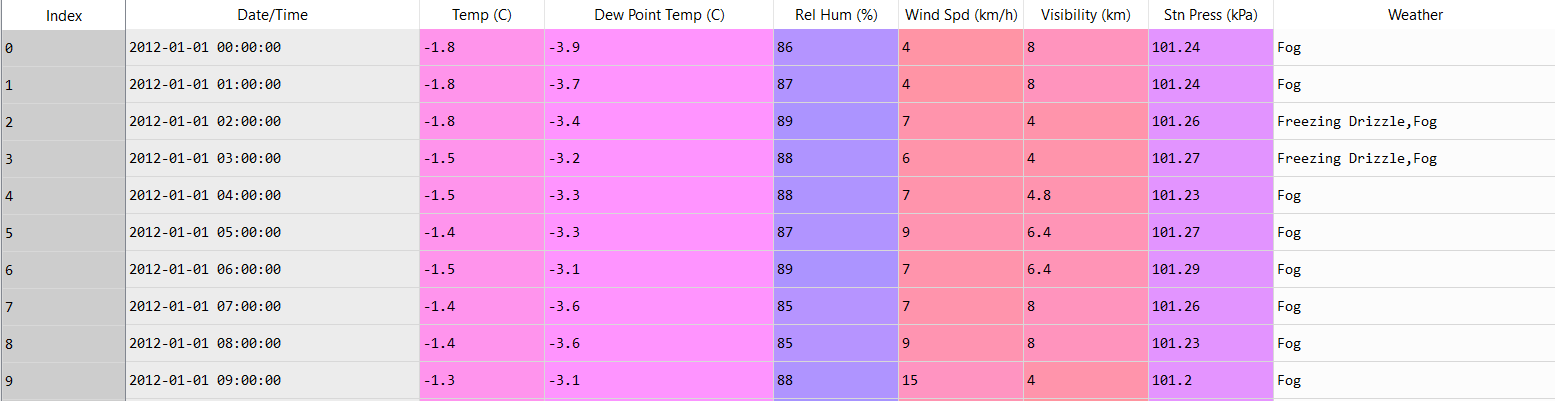

| Name | Description |
|:----:|:-----------:|
Date/Time | Date & Time for each hour in the year 2012.
Temp(C)	| Exact temperature at a given time.
Dew Point Temp(C) | Dew Point Temp at a given time. It is the temperature to which<br> air must be cooled to become saturated with water vapor.
Rel Hum (%) | Relative Humidity at a given time.
Wind Spd (km/h) | Wind Speed in km/h at a given time.
Visibility (km) | Visibility in km at a given time.
Stn Press (kPa) | Station Pressure observed at that time.
Weather	| Weather at a given time.

### Instructions
Different functions that you would require to define for this project has been mentioned in the code block. All the parameters and the task, a function would do, have been mentioned there.
* Load the `weather_2012` data csv file and store it in `weather` variable. The path of the dataset has been stored in the variable path for you.
* Check the categorical and numerical variables. You can check it by calling `categorical` and `numerical` functions.
* Check the distribution of a specific value like the number of times the weather was exactly Cloudy in the given column. Feel free to check on other values. You can check it by calling the function `clear` with respective parameters.
* By using the index of the value or name of the value you can check the number of counts. Now suppose you want to check some instances based on a specific condition like when the wind speed was above 35 and visibility was 25. You can directly check it by calling the function `instances_based_condition` with respective parameters and store the resulting dataframe in `wind_speed_35_vis_25`.
* You have temperature data and want to calculate the mean temperature recorded by month. You can generate a pivot table that contains the aggregated values (like mean, max, min, sum, len) recorded by month. You can call the function `agg_values_ina_month` with respective parameters.
* To groupby based on a column like you want to groupby on `Weather` column and then aggregate the mean values of each column for different types of weather using mean. You can call the function `group_values` and store the resulting dataframe in `mean_weather`. Feel free to try on different aggregated functions like max, min, sum, len
* You want to convert Celsius temperature into Fahrenheit temperatures. Call the function `convert` to do the same.

In [1]:
#Importing the modules
import pandas as pd
import numpy as np
from scipy.stats import mode

In [2]:
#Code for categorical variable
def categorical(df):
    return df.select_dtypes(include = 'object').columns.tolist()

""" Extract names of categorical column
This function accepts a dataframe and returns categorical list,
containing the names of categorical columns(categorical_var).
Keyword arguments:
df - Pandas dataframe from which the columns name will be extracted
Returns:
categorical_var - List of categorical features
"""

' Extract names of categorical column\nThis function accepts a dataframe and returns categorical list,\ncontaining the names of categorical columns(categorical_var).\nKeyword arguments:\ndf - Pandas dataframe from which the columns name will be extracted\nReturns:\ncategorical_var - List of categorical features\n'

In [3]:
#Code for numerical variable
def numerical(df):
    return df.select_dtypes(include = 'number').columns.tolist()

""" Extract names of numerical column
This function accepts a dataframe and returns numerical list,
containing the names of numerical columns(numerical_var).
Keyword arguments:
df - Pandas dataframe from which the columns name will be extracted
Returns:
numerical_var - List of numerical features
"""

' Extract names of numerical column\nThis function accepts a dataframe and returns numerical list,\ncontaining the names of numerical columns(numerical_var).\nKeyword arguments:\ndf - Pandas dataframe from which the columns name will be extracted\nReturns:\nnumerical_var - List of numerical features\n'

In [4]:
#code to check distribution of variable
def clear(df, col, val):
    return df[col].value_counts()[val]
    
""" Check distribution of variable
This function accepts a dataframe, column(feature) and value which returns count of the value,
containing the value counts of a variable(value_counts)
Keyword arguments:
df - Pandas dataframe
col - Feature of the datagrame
val - value of the feature
Returns:
value_counts - Value count of the feature 
"""

' Check distribution of variable\nThis function accepts a dataframe, column(feature) and value which returns count of the value,\ncontaining the value counts of a variable(value_counts)\nKeyword arguments:\ndf - Pandas dataframe\ncol - Feature of the datagrame\nval - value of the feature\nReturns:\nvalue_counts - Value count of the feature \n'

In [5]:
#Code to check instances based on the condition
def instances_based_condition(df, col1, val1, col2, val2):
    return df[(df[col1] > val1) & (df[col2]== val2)]
    
""" Instances based on the condition
This function accepts a dataframe, 2 columns (feature) and 2 values which returns the dataframe
based on the condition.
Keyword arguments:
df - Pandas dataframe which has the data.
col1 - First feature of the dataframe on which you want to apply the filter
val1 - Value to be filtered on the first feature
col2 - Second feature of the dataframe on which you want to apply the filter
val2 - Value to be filtered on second feature
Returns:
instance - Generated dataframe
"""

' Instances based on the condition\nThis function accepts a dataframe, 2 columns (feature) and 2 values which returns the dataframe\nbased on the condition.\nKeyword arguments:\ndf - Pandas dataframe which has the data.\ncol1 - First feature of the dataframe on which you want to apply the filter\nval1 - Value to be filtered on the first feature\ncol2 - Second feature of the dataframe on which you want to apply the filter\nval2 - Value to be filtered on second feature\nReturns:\ninstance - Generated dataframe\n'

In [6]:
# Code to calculate different aggreagted values according to month
import datetime

def agg_values_ina_month(df, date_col, agg_col, agg):   
    '''df['Month'] = pd.DatetimeIndex(df[date_col]).month                                
    return df.pivot_table(index = 'Month', values = agg_col, aggfunc = agg )'''

    df[date_col] = pd.to_datetime(df[date_col])
    aggregate = {'mean':np.mean,'max':np.max,'min':np.min,'sum':np.sum,'len':len}
    aggregated_value = df.pivot_table(values=[agg_col], index=df[date_col].dt.month,aggfunc={agg_col:aggregate[agg]})
    return aggregated_value
    
""" Aggregate values according to month
This function accepts a dataframe, 2 columns (feature) and aggregated funcion(agg) which returns the Pivot 
table with different aggregated value of the feature with an index of the month.
Keyword arguments:
df - Pandas dataframe which has the data.
date_col - Date feature of the dataframe on which you want to apply to_datetime conversion
agg_col - Feature of the dataframe on which values will be aggregated.
agg - The function to be used for aggregating the df (eg. 'mean', 'min', 'max').
Returns:
aggregated_value - Generated pivot table
"""

" Aggregate values according to month\nThis function accepts a dataframe, 2 columns (feature) and aggregated funcion(agg) which returns the Pivot \ntable with different aggregated value of the feature with an index of the month.\nKeyword arguments:\ndf - Pandas dataframe which has the data.\ndate_col - Date feature of the dataframe on which you want to apply to_datetime conversion\nagg_col - Feature of the dataframe on which values will be aggregated.\nagg - The function to be used for aggregating the df (eg. 'mean', 'min', 'max').\nReturns:\naggregated_value - Generated pivot table\n"

In [7]:
# Code to group values based on the feature
def group_values(df, col1, agg1):
    # return df.pivot_table(index = col1, aggfunc = agg1 )

    aggregate = {'mean':np.mean,'max':np.max,'min':np.min,'sum':np.sum,'len':len}
    grouping = df.groupby(col1).agg(aggregate[agg1])
    return grouping
    
""" Agrregate values by grouping
This function accepts a dataframe, 1 column(feature) and aggregated function(agg1) which groupby the 
datframe based on the column.
Keyword arguments:
df - Pandas dataframe which has the data.
col1 - Feature of the dataframe on which values will be aggregated.
agg1 - The function to be used for aggregating the df (eg. 'mean', 'min', 'max').
Returns:
grouping - Dataframe with all columns on which it is grouped on.
"""

" Agrregate values by grouping\nThis function accepts a dataframe, 1 column(feature) and aggregated function(agg1) which groupby the \ndatframe based on the column.\nKeyword arguments:\ndf - Pandas dataframe which has the data.\ncol1 - Feature of the dataframe on which values will be aggregated.\nagg1 - The function to be used for aggregating the df (eg. 'mean', 'min', 'max').\nReturns:\ngrouping - Dataframe with all columns on which it is grouped on.\n"

In [8]:
# function for conversion 
def convert(df, celsius):
    '''df[celsius] = df[celsius].apply( lambda x: (x*(9/5))+32 )
    return df'''

    centigrade_temps = df[celsius]
    converted_temp =  1.8*centigrade_temps + 32
    return converted_temp
    
""" Convert temperatures from celsius to fahrenhheit
This function accepts a dataframe, 1 column(feature) which returns the dataframe with converted values from 
celsius to fahrenhheit.
Keyword arguments:
df - Pandas dataframe which has the data.
celsius - Temperature feature of the dataframe which you want to convert to fahrenhheit
Returns:
converted_temp - Generated dataframe with Fahrenhheit temp. """

' Convert temperatures from celsius to fahrenhheit\nThis function accepts a dataframe, 1 column(feature) which returns the dataframe with converted values from \ncelsius to fahrenhheit.\nKeyword arguments:\ndf - Pandas dataframe which has the data.\ncelsius - Temperature feature of the dataframe which you want to convert to fahrenhheit\nReturns:\nconverted_temp - Generated dataframe with Fahrenhheit temp. '

In [9]:
''' Load the weather_2012 data csv file and store it in weather variable. The path of the dataset has been stored in the 
variable `path` for you. '''
weather = pd.read_csv("C:\\Users\\sherw\\OneDrive\\Desktop\\GreyAtom Data Science Resources\\Datasets\\weather_2012.csv")
weather.head()

''' As you have now loaded the weather data you might want to check the categorical and numerical variables. 
You can check it by calling categorical and numerical function. '''
categorical_var = categorical(weather)
print(categorical_var)

numerical_var = numerical(weather)
print(numerical_var)

['Date/Time', 'Weather']
['Temp (C)', 'Dew Point Temp (C)', 'Rel Hum (%)', 'Wind Spd (km/h)', 'Visibility (km)', 'Stn Press (kPa)']


In [10]:
''' You might be interested in checking the distribution of a specific value like the number of times the weather was 
exactly Cloudy in the given column. Feel free to check on other values.
You can check it by calling the function clear with respective parameters.
By using index of the value or name of the value you can check the number of count '''
print(clear(weather,"Weather",'Clear'))
print(clear(weather,"Wind Spd (km/h)", 4))

1326
474


In [11]:
''' Now suppose you want to check some instances based on a specific condition like when the wind speed was above 35 and 
visibility was 25. You can directly check it by calling the function instances_based_condition with respective parameters. '''
instance = instances_based_condition(weather,'Wind Spd (km/h)',35,'Visibility (km)',25)
print(instance)

                Date/Time  Temp (C)  Dew Point Temp (C)  Rel Hum (%)  \
25    2012-01-02 01:00:00       4.6                 0.0           72   
409   2012-01-18 01:00:00       3.7                -2.1           66   
410   2012-01-18 02:00:00       0.5                -4.0           72   
411   2012-01-18 03:00:00      -3.5                -8.2           70   
412   2012-01-18 04:00:00      -6.1               -10.9           69   
557   2012-01-24 05:00:00       3.7                -0.2           76   
583   2012-01-25 07:00:00      -3.9               -10.0           63   
670   2012-01-28 22:00:00       2.3                -2.0           73   
672   2012-01-29 00:00:00       1.5                -5.0           62   
673   2012-01-29 01:00:00       0.9                -5.3           63   
674   2012-01-29 02:00:00       0.3                -5.8           64   
675   2012-01-29 03:00:00      -0.2                -6.0           65   
676   2012-01-29 04:00:00      -0.9                -7.0         

In [12]:
''' You have temperature data and want to calculate the mean temperature recorded by month.You can generate a pivot table 
which contains the aggregated values (like mean, max ,min, sum, len) recoreded by month. 
You can call the function agg_values_ina_month with respective parameters. '''
aggregated_value = agg_values_ina_month(weather,'Date/Time','Dew Point Temp (C)','mean')
print(aggregated_value)

           Dew Point Temp (C)
Date/Time                    
1                  -12.294758
2                   -9.221695
3                   -3.488575
4                   -1.934583
5                    8.080780
6                   11.738056
7                   14.595430
8                   15.644758
9                   10.757917
10                   6.533468
11                  -4.179306
12                  -6.129032


In [13]:
''' To groupby based on a column like you want to groupby on Weather column and then aggregate the mean values of each 
column for different types of weather using mean. You can call the function group_values.
Feel free to try on diffrent aggregated functions like max, min, sum, len '''
grouping = group_values(weather,"Weather",'mean')
print(grouping)

                                          Temp (C)  Dew Point Temp (C)  \
Weather                                                                  
Clear                                     6.825716            0.089367   
Cloudy                                    7.970544            2.375810   
Drizzle                                   7.353659            5.504878   
Drizzle,Fog                               8.067500            7.033750   
Drizzle,Ice Pellets,Fog                   0.400000           -0.700000   
Drizzle,Snow                              1.050000            0.150000   
Drizzle,Snow,Fog                          0.693333            0.120000   
Fog                                       4.303333            3.159333   
Freezing Drizzle                         -5.657143           -8.000000   
Freezing Drizzle,Fog                     -2.533333           -4.183333   
Freezing Drizzle,Haze                    -5.433333           -8.000000   
Freezing Drizzle,Snow                 

In [14]:
''' You have a temperature data and wanted to convert celsius temperature into fahrehheit temperatures you can call the 
function convert. '''
converted_temp = convert(weather,"Temp (C)")
print(converted_temp)

0       28.76
1       28.76
2       28.76
3       29.30
4       29.30
        ...  
8779    32.18
8780    32.36
8781    31.10
8782    31.64
8783    32.00
Name: Temp (C), Length: 8784, dtype: float64
